<a href="https://colab.research.google.com/github/Blockchain-Framework/bitcoin-anomaly-analysis/blob/develop/Notebooks/BItcoin_Model_Training_Upsampling_Downsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

train = pd.read_csv('/content/drive/MyDrive/bitcoin_imbalance_train_set.csv')
test = pd.read_csv("/content/drive/MyDrive/bitcoin_imbalance_test.csv")

In [ ]:
original_feature_names = ['input_transaction_count', 'output_transaction_count',
       'input_value_mean', 'input_value_median', 'input_value_maximum',
       'input_value_minimum', 'input_value_25th_percentile',
       'input_value_75th_percentile', 'input_value_range',
       'input_spending_value_usd_mean', 'input_spending_value_usd_median',
       'input_spending_value_usd_maximum', 'input_spending_value_usd_minimum',
       'input_spending_value_usd_25th_percentile',
       'input_spending_value_usd_75th_percentile',
       'input_spending_value_usd_range', 'input_time_diff_mean',
       'input_time_diff_median', 'input_time_diff_maximum',
       'input_time_diff_minimum', 'input_time_diff_25th_percentile',
       'input_time_diff_75th_percentile', 'input_time_diff_range',
       'output_value_usd_mean', 'output_value_usd_median',
       'output_value_usd_maximum', 'output_value_usd_minimum',
       'output_value_usd_25th_percentile', 'output_value_usd_75th_percentile',
       'output_value_usd_range', 'output_time_diff_mean',
       'output_time_diff_median', 'output_time_diff_maximum',
       'output_time_diff_minimum', 'output_time_diff_25th_percentile',
       'output_time_diff_75th_percentile', 'output_time_diff_range',
       'output_value_mean', 'output_value_median', 'output_value_maximum',
       'output_value_minimum', 'output_value_25th_percentile',
       'output_value_75th_percentile', 'output_value_range',
       'input_output_mean_ratio', 'input_output_max_ratio',
       'input_output_min_ratio', 'input_output_percentile_25_diff',
       'input_output_percentile_75_diff', 'range_mean_ratio_input',
       'range_mean_ratio_output', 'input_output_usd_mean_ratio',
       'input_output_usd_max_ratio', 'input_output_usd_min_ratio',
       'input_output_usd_percentile_25_diff',
       'input_output_usd_percentile_75_diff', 'input_range_mean_ratio',
       'output_range_mean_ratio', 'input_output_transaction_count_ratio',
       'input_output_maximum_transaction_value_diff',
       'input_output_minimum_transaction_value_diff',
       'input_output_time_diff_max_min_diff']

In [ ]:
X_train = train[original_feature_names]
y_train = train['label']

In [ ]:
def showResult(y_test, y_pred_test):
   # Confusion Matrix
  conf_matrix = confusion_matrix(y_test, y_pred_test)
  class_labels = [0, 1, 2, 3]
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
X_test = test[original_feature_names]
y_test = test['label']

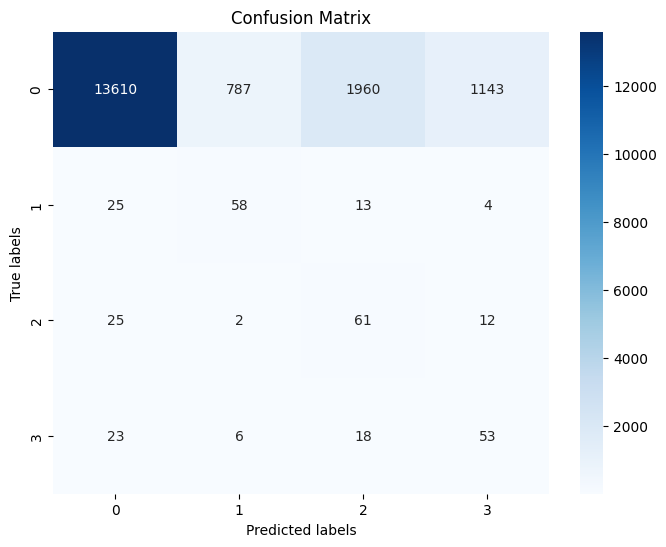

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler

# Creating a pipeline with upsampling and Random Forest model
pipeline_rf_up = make_pipeline_imb(
    StandardScaler(),
    RandomOverSampler(random_state=42),
    RandomForestClassifier(n_estimators=200, random_state=42)
)

# Example usage:
pipeline_rf_up.fit(X_train, y_train)
y_pred_up = pipeline_rf_up.predict(X_test)
showResult(y_test, y_pred_up)


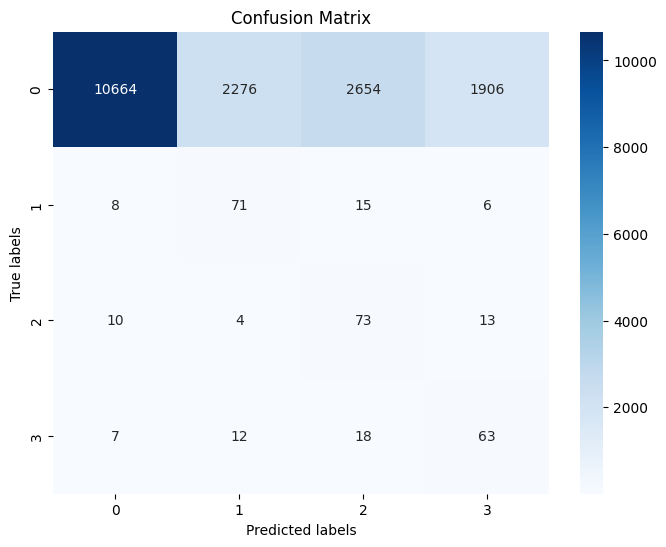

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Creating a pipeline with downsampling and Random Forest model
pipeline_rf_down = make_pipeline_imb(
    StandardScaler(),
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(n_estimators=200, random_state=42)
)

# Example usage:
pipeline_rf_down.fit(X_train, y_train)
y_pred_down = pipeline_rf_down.predict(X_test)
showResult(y_test, y_pred_down)


In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler

# Creating a pipeline with upsampling and SVM model
pipeline_svm_up = make_pipeline_imb(
    StandardScaler(),
    RandomOverSampler(random_state=42),
    SVC(kernel='rbf', C=1.0, random_state=42)
)

# Example usage:
pipeline_svm_up.fit(X_train, y_train)
y_pred_up = pipeline_svm_up.predict(X_test)
showResult(y_test, y_pred_up)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Creating a pipeline with downsampling and SVM model
pipeline_svm_down = make_pipeline_imb(
    StandardScaler(),
    RandomUnderSampler(random_state=42),
    SVC(kernel='rbf', C=1.0, random_state=42)
)

# Example usage:
pipeline_svm_down.fit(X_train, y_train)
y_pred_down = pipeline_svm_down.predict(X_test)
showResult(y_test, y_pred_down)


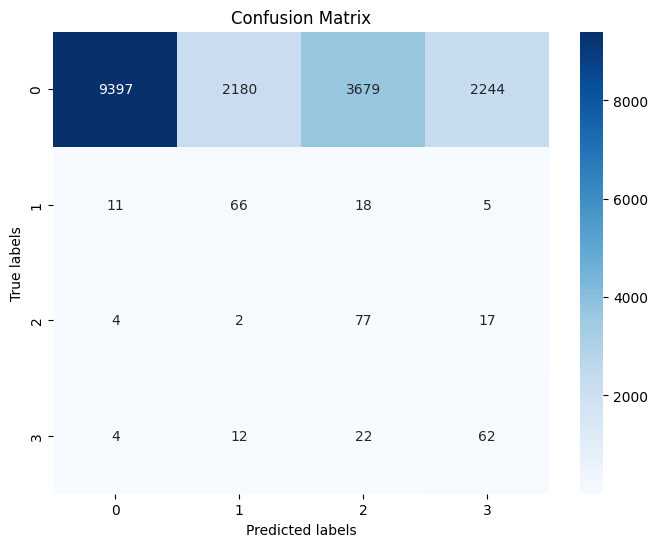

In [ ]:
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler

pipeline_xgb_up = make_pipeline_imb(
    StandardScaler(),
    RandomOverSampler(random_state=42),
    xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
)

pipeline_xgb_up.fit(X_train, y_train)
y_pred_up = pipeline_xgb_up.predict(X_test)
showResult(y_test, y_pred_up)


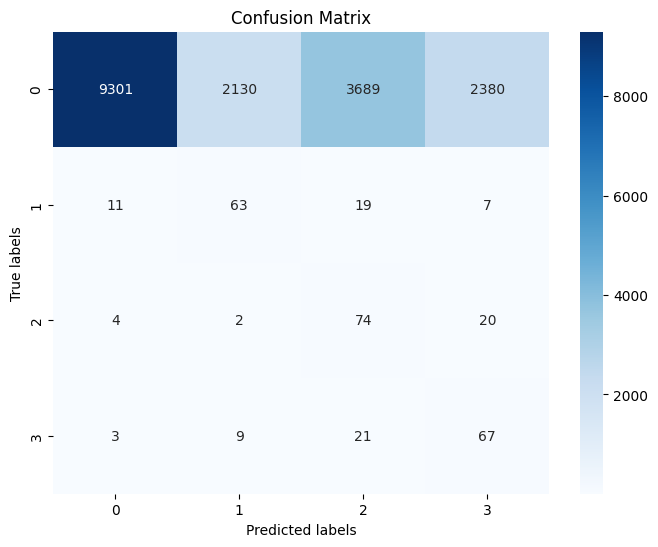

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

pipeline_xgb_down = make_pipeline_imb(
    StandardScaler(),
    RandomUnderSampler(random_state=42),
    xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
)

pipeline_xgb_down.fit(X_train, y_train)
y_pred_down = pipeline_xgb_down.predict(X_test)
showResult(y_test, y_pred_down)


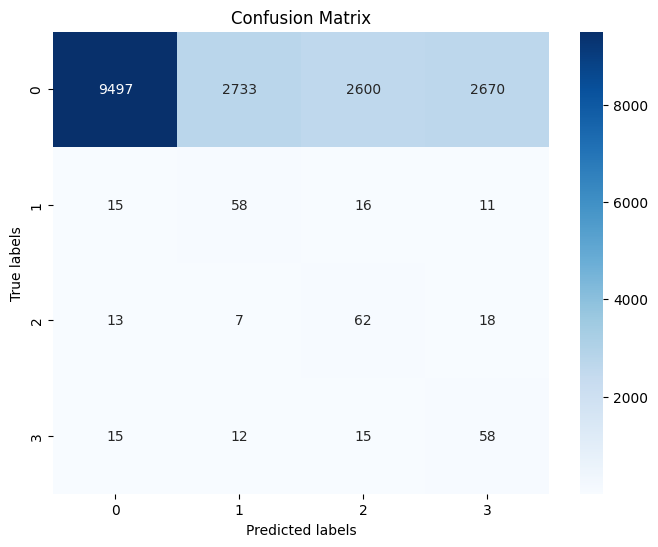

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn_up = make_pipeline_imb(
    StandardScaler(),
    RandomOverSampler(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
)

pipeline_knn_up.fit(X_train, y_train)
y_pred_up = pipeline_knn_up.predict(X_test)
showResult(y_test, y_pred_up)


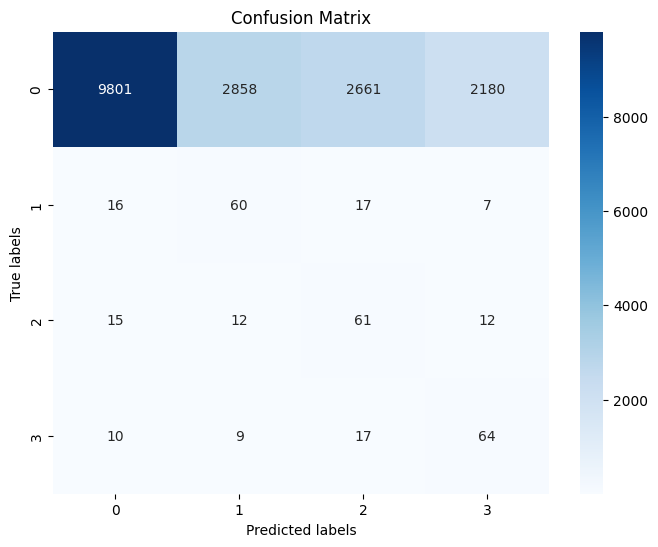

In [ ]:
pipeline_knn_down = make_pipeline_imb(
    StandardScaler(),
    RandomUnderSampler(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
)

pipeline_knn_down.fit(X_train, y_train)
y_pred_down = pipeline_knn_down.predict(X_test)
showResult(y_test, y_pred_down)


In [ ]:
from keras.layers import Layer, Dense, Flatten
from keras.models import Sequential
from keras import backend as K
from keras.losses import categorical_crossentropy

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

def RBFNN(shape, classes):
  # Define the model
  model = Sequential()
  model.add(Flatten(input_shape=shape))  # Assuming input shape is (28, 28). Change as needed.
  model.add(RBFLayer(10, 0.5))  # RBF Layer
  model.add(Dense(classes, activation='softmax'))  # Output layer for 4 classes

  # Compile the model
  model.compile(optimizer='rmsprop', loss=categorical_crossentropy, metrics=['accuracy'])

  # Model summary
  model.summary()
  return model


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np

def keras_model_pipeline(X_train, y_train, X_test, y_test, model, oversample=True, epochs=5, batch_size=32):

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Resampling (Oversampling if enabled)
    if oversample:
        resampler = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_scaled, y_train)
    else:
       resampler = RandomUnderSampler(random_state=1)
       X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_scaled, y_train)


    # Convert labels to categorical
    y_train_categorical = to_categorical(y_train_resampled, num_classes=4)
    y_test_categorical = to_categorical(y_test, num_classes=4)

    # Train the model
    model.fit(X_train_resampled, y_train_categorical, epochs=epochs, batch_size=batch_size)

    # Evaluate the model
    y_pred = model.predict(X_test_scaled)
    scores = model.evaluate(X_test_scaled, y_test_categorical)

    # Confusion Matrix
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test_categorical, axis=1)
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Plotting Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return scores




In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class RBFNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, shape, classes, epochs=10, batch_size=32, oversample=True):
        self.shape = shape
        self.classes = classes
        self.epochs = epochs
        self.batch_size = batch_size
        self.oversample = oversample
        self.model = RBFNN(shape, classes)

    def fit(self, X, y):
        # Scaling features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Resampling
        if self.oversample:
            resampler = RandomOverSampler(random_state=42)
        else:
            resampler = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = resampler.fit_resample(X_scaled, y)

        # Convert labels to categorical
        y_categorical = to_categorical(y_resampled, num_classes=self.classes)

        # Train the model
        self.model.fit(X_resampled, y_categorical, epochs=self.epochs, batch_size=self.batch_size)

    def predict(self, X):
        # Assuming X is already scaled as it should be in a typical pipeline
        predictions = self.model.predict(X)
        return np.argmax(predictions, axis=1)

    def score(self, X, y):
        y_categorical = to_categorical(y, num_classes=self.classes)
        _, accuracy = self.model.evaluate(X, y_categorical)
        return accuracy

    def plot_confusion_matrix(self, X, y):
        y_pred = self.predict(X)
        y_categorical = to_categorical(y, num_classes=self.classes)
        y_true = np.argmax(y_categorical, axis=1)

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

In [ ]:
input_shape = (X_train.shape[1], )  # Number of features

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 62)                0         
                                                                 
 rbf_layer_2 (RBFLayer)      (None, 10)                620       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 664 (2.59 KB)
Trainable params: 664 (2.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5001/5001 [==============================] - 10s 2ms/step - loss: 1.2501 - accuracy: 0.4412
Epoch 2/100
5001/5001 [==============================] - 11s 2ms/step - loss: 1.2101 - accuracy: 0.4572
Epoch 3/100
5001/5001 [==============================] - 10s 2ms/step - loss: 1.

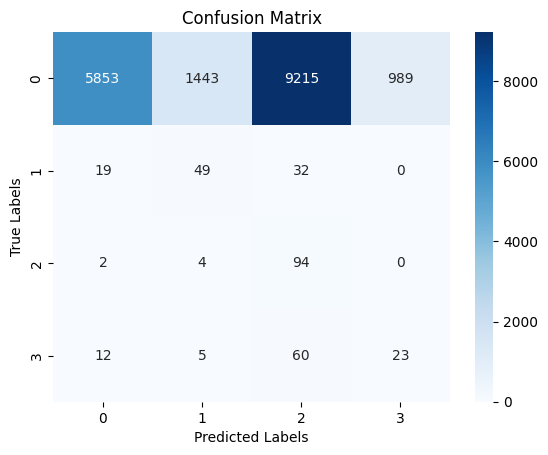

[1.2083417177200317, 0.33814606070518494]

In [ ]:
model_up = RBFNN(input_shape, 4)
scores = keras_model_pipeline(X_train, y_train, X_test, y_test, model_up, oversample=True, epochs=100, batch_size=32)
scores

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 62)                0         
                                                                 
 rbf_layer_3 (RBFLayer)      (None, 10)                620       
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
Total params: 664 (2.59 KB)
Trainable params: 664 (2.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
978/978 [==============================] - 3s 2ms/step - loss: 1.3189 - accuracy: 0.4018
Epoch 2/100
978/978 [==============================] - 2s 2ms/step - loss: 1.2542 - accuracy: 0.4426
Epoch 3/100
978/978 [==============================] - 2s 2ms/step - loss: 1.2299 - ac

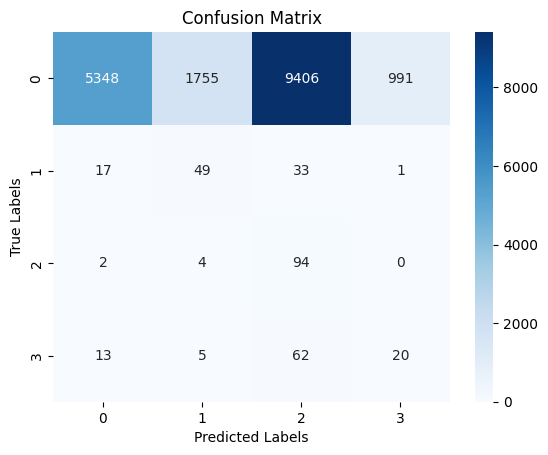

[1.3103647232055664, 0.30960673093795776]

In [ ]:
model_down = RBFNN(input_shape, 4)
scores = keras_model_pipeline(X_train, y_train, X_test, y_test, model_down, oversample=False, epochs=100, batch_size=32)
scores

In [ ]:
rbfnn_wrapper = RBFNNWrapper(shape=input_shape, classes=4, epochs=10, batch_size=32, oversample=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 62)                0         
                                                                 
 rbf_layer_6 (RBFLayer)      (None, 10)                620       
                                                                 
 dense_6 (Dense)             (None, 4)                 44        
                                                                 
Total params: 664 (2.59 KB)
Trainable params: 664 (2.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 62)                0         
                                                                 
 rbf_layer_7 (RBFLayer)      (None, 10)                620       
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
Total params: 664 (2.59 KB)
Trainable params: 664 (2.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
5001/5001 [==============================] - 11s 2ms/step - loss: 1.2544 - accuracy: 0.4375
Epoch 2/10
5001/5001 [==============================] - 10s 2ms/step - loss: 1.2112 - accuracy: 0.4527
Epoch 3/10
5001/5001 [==============================] - 9s 2ms/step - loss: 1.2042

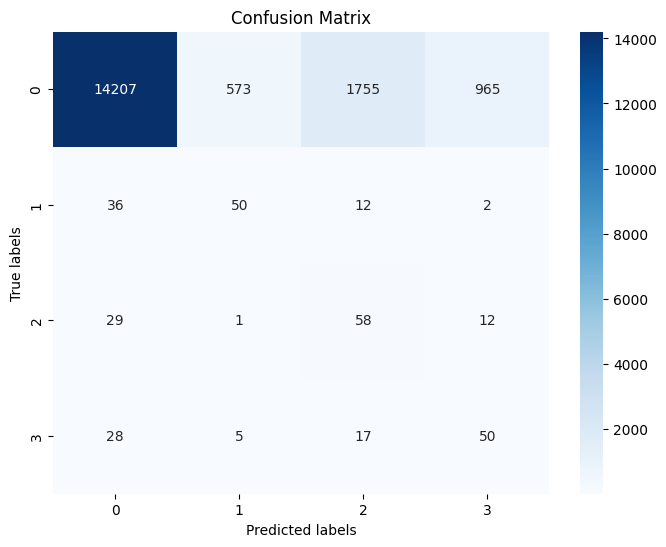

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('rf_up', pipeline_rf_up),
        ('knn_up', pipeline_knn_up),
        ('xbg_up', pipeline_xgb_up),
        ('rbfnn', rbfnn_wrapper)

    ],
    voting='hard'
)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)
showResult(y_test, ensemble_predictions)